In [2]:
# 파일 삽입

import pandas as pd

data = pd.read_csv('bird2025.csv')
print(data)

      id   q1 q2 q3 q4 q5 q6 q7 q8  mbti                 time
0      1    A  B  A  B  A  B  A  B  ENFJ  2025-03-11 10:20:36
1      2    A  A  B  B  B  B  B  B  ESTJ  2025-03-11 10:23:06
2      3  NaN  A  A  A  A  A  A  A  ISTJ  2025-03-11 10:27:10
3      4    A  A  A  B  B  A  B  A  ISTJ  2025-03-11 10:29:26
4      5    A  A  B  A  A  A  B  B  ISTP  2025-03-11 10:29:44
..   ...  ... .. .. .. .. .. .. ..   ...                  ...
96    97    A  A  B  B  A  A  B  B  ESTP  2025-03-12 15:28:41
97    98    A  A  B  B  B  A  B  B  ESTP  2025-03-12 15:44:51
98    99    B  A  A  B  A  A  A  A  ESFJ  2025-03-12 19:48:14
99   100    A  B  A  B  B  A  A  A  ENFJ  2025-03-14 12:45:27
100  101    A  A  A  A  A  A  B  A  ISTJ  2025-03-14 18:43:23

[101 rows x 11 columns]


In [3]:
# 'NULL' 포함된 행 삭제

clean_data = data.dropna()
print(clean_data)

      id q1 q2 q3 q4 q5 q6 q7 q8  mbti                 time
0      1  A  B  A  B  A  B  A  B  ENFJ  2025-03-11 10:20:36
1      2  A  A  B  B  B  B  B  B  ESTJ  2025-03-11 10:23:06
3      4  A  A  A  B  B  A  B  A  ISTJ  2025-03-11 10:29:26
4      5  A  A  B  A  A  A  B  B  ISTP  2025-03-11 10:29:44
5      6  A  A  B  B  B  B  B  A  ESFJ  2025-03-11 10:33:56
..   ... .. .. .. .. .. .. .. ..   ...                  ...
96    97  A  A  B  B  A  A  B  B  ESTP  2025-03-12 15:28:41
97    98  A  A  B  B  B  A  B  B  ESTP  2025-03-12 15:44:51
98    99  B  A  A  B  A  A  A  A  ESFJ  2025-03-12 19:48:14
99   100  A  B  A  B  B  A  A  A  ENFJ  2025-03-14 12:45:27
100  101  A  A  A  A  A  A  B  A  ISTJ  2025-03-14 18:43:23

[96 rows x 11 columns]


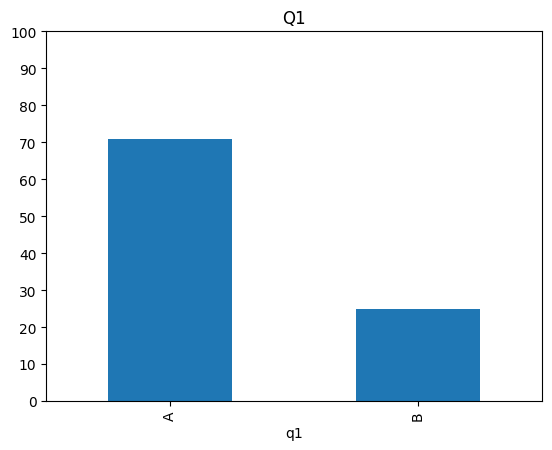

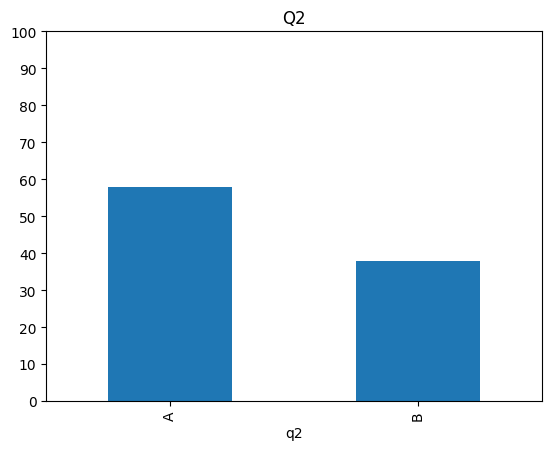

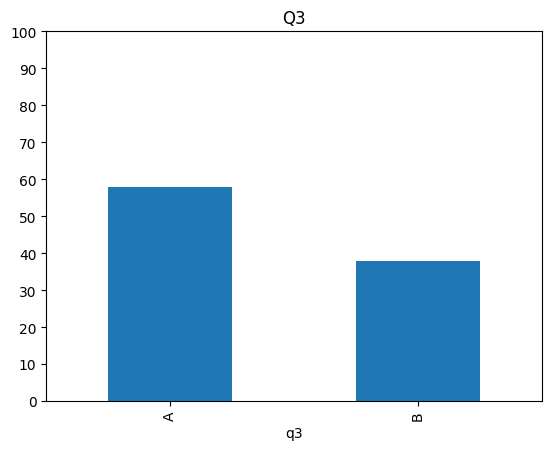

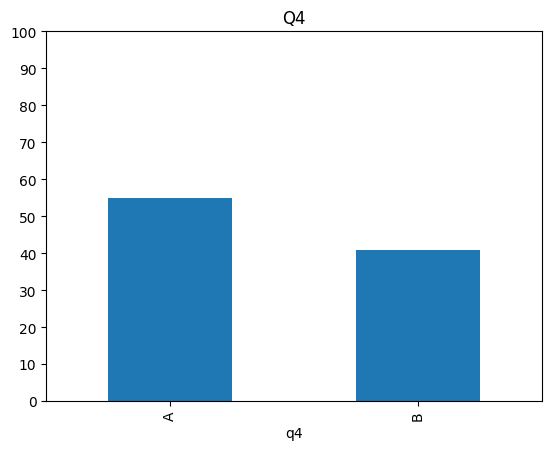

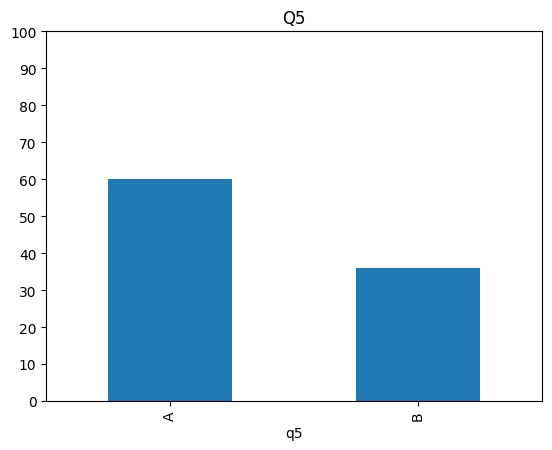

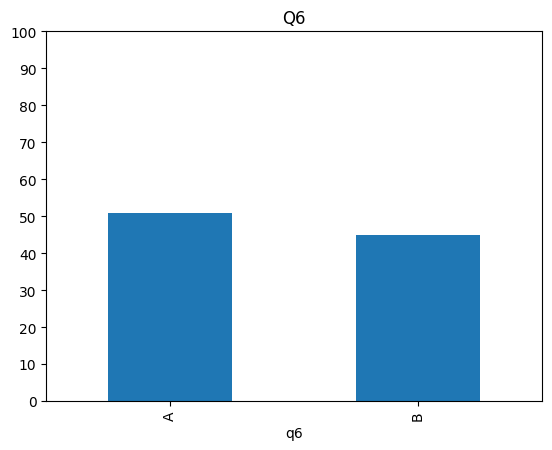

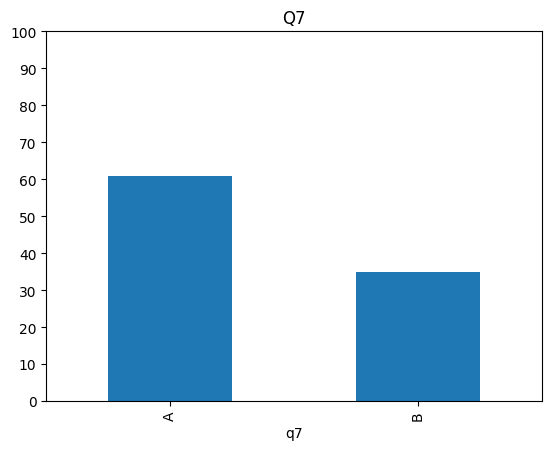

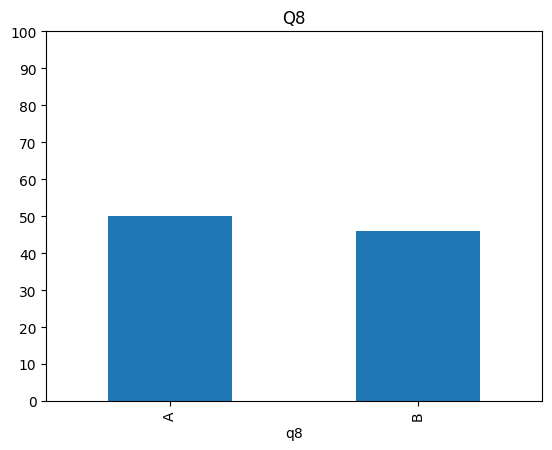

In [4]:
# 각 질문별 A/B 응답 통계

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

titles = {
    'q1': 'Q1',
    'q2': 'Q2',
    'q3': 'Q3',
    'q4': 'Q4',
    'q5': 'Q5',
    'q6': 'Q6',
    'q7': 'Q7',
    'q8': 'Q8'
}

x_labels = {
    'q1': ['A', 'B'],
    'q2': ['A', 'B'],
    'q3': ['A', 'B'],
    'q4': ['A', 'B'],
    'q5': ['A', 'B'],
    'q6': ['A', 'B'],
    'q7': ['A', 'B'],
    'q8': ['A', 'B']
}

for q in ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8']:
    counts = clean_data[q].value_counts()

    plt.figure()
    counts.plot(kind='bar')
    plt.title(titles[q])
    plt.xticks(ticks=[0, 1], labels=x_labels[q])
    plt.ylim(0, 100)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

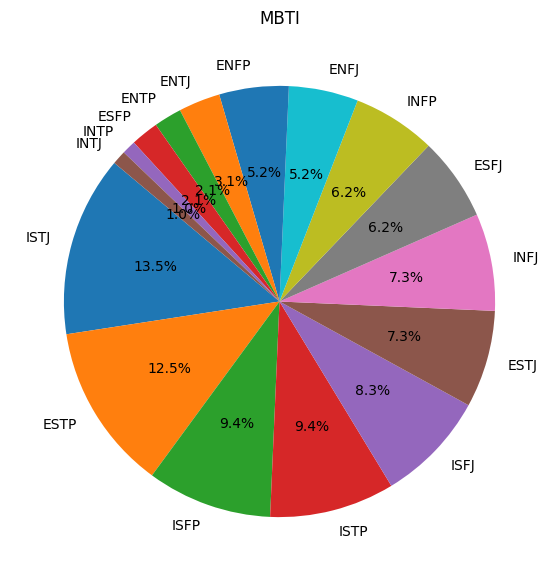

In [8]:
# MBTI 통계

mbti_counts = clean_data['mbti'].value_counts()

plt.figure(figsize=(10, 7))
mbti_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('MBTI')
plt.ylabel('')
plt.show()

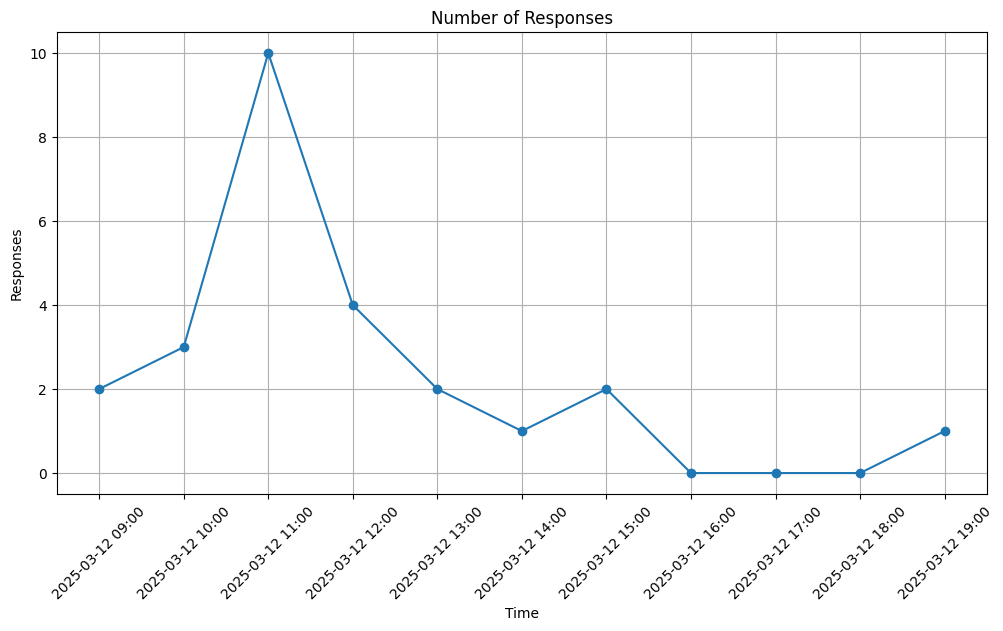

In [21]:
# 응답 시간 통계

from matplotlib.dates import HourLocator, DateFormatter

clean_data['time'] = pd.to_datetime(clean_data['time'])

start_date = pd.to_datetime('2025-03-12 00:00:00')
end_date = pd.to_datetime('2025-03-14 00:00:00')
filtered_data = clean_data[(clean_data['time'] >= start_date) & (clean_data['time'] < end_date)]


hourly_responses = filtered_data.resample('h', on='time').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_responses.index, hourly_responses, marker='o')
plt.title('Number of Responses')
plt.xlabel('Time')
plt.ylabel('Responses')
plt.xticks(rotation=45)
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(HourLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))

plt.show()